In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import zipfile
from keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd

In [ ]:
local_zip = '/content/drive/MyDrive/file/humans-20221217T072717Z-001.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/MyDrive/file/humans-20221217T072717Z-001')
zip_ref.close()

In [ ]:
local_zip = '/content/drive/MyDrive/file/horses-20221217T071158Z-001.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/MyDrive/file/horses-20221217T071158Z-001')
zip_ref.close()

In [ ]:
# Directory with our training horse pitcher
train_horse_dir = os.path.join('/content/drive/MyDrive/file/horses-20221217T071158Z-001/horses')
# Directory with our training human pitcher
train_human_dir = os.path.join('/content/drive/MyDrive/file/humans-20221217T072717Z-001/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse3-584.png', 'horse5-405.png', 'horse6-004.png', 'horse5-360.png', 'horse6-089.png', 'horse3-498.png', 'horse5-488.png', 'horse6-153.png', 'horse6-403.png', 'horse5-589.png']
['valhuman05-16.png', 'valhuman04-10.png', 'valhuman05-11.png', 'valhuman05-03.png', 'valhuman05-27.png', 'valhuman04-11.png', 'valhuman05-17.png', 'valhuman05-18.png', 'valhuman04-22.png', 'valhuman05-05.png']


In [ ]:
print('total training horse image:',len(os.listdir(train_horse_dir)))
print('total training human image : ',len(os.listdir(train_human_dir)))

total training horse image: 128
total training human image :  128


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameter for our graph; we wail output image in a 4X4 configuration 
nrows = 4
ncols = 4

# index for iterating over images
pic_index = 0


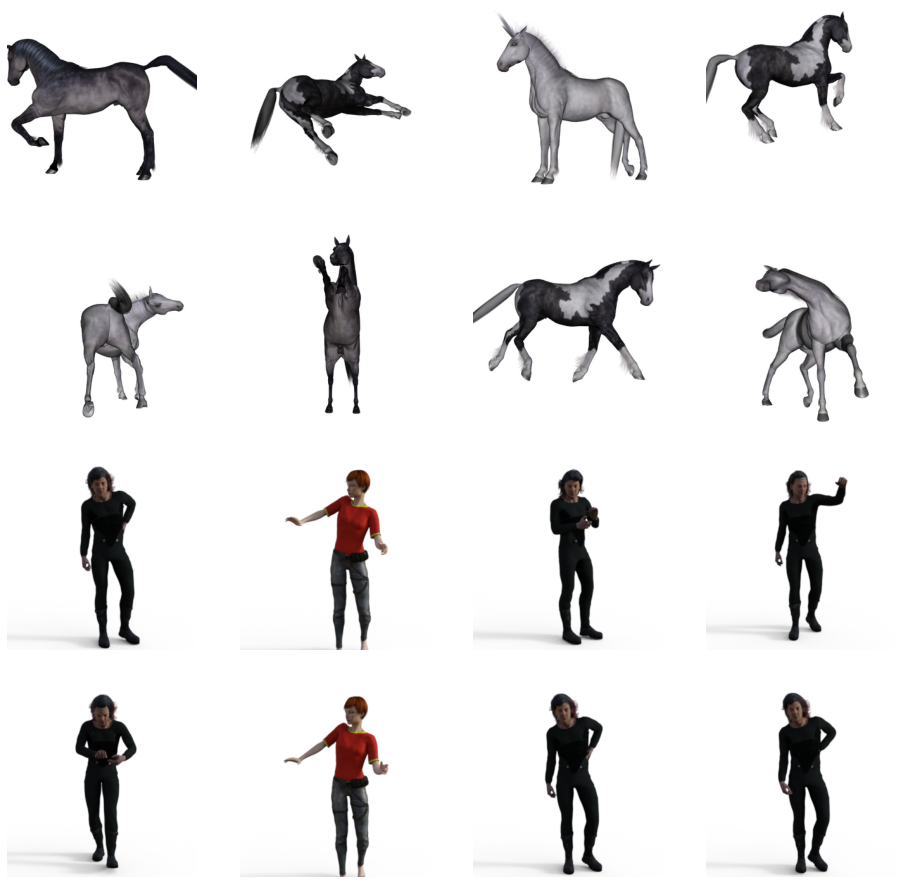

In [ ]:
# set up matplotlib fig and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4 , nrows * 4)
pic_index =8
next_horse_pix = [os.path.join(train_horse_dir,fname)
                   for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname)
                    for fname in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # set up subplot: subplot indicates start at 1
  sp = plt.subplot(nrows,ncols,i + 1) 
  sp.axis('off') # don't show axis (or grid) 

  img = mpimg.imread(img_path)
  plt.imshow(img) 
plt.show()                                      


In [ ]:
import tensorflow as tf

In [ ]:
#defining the model
model = tf.keras.Sequential([
    #our first convolution
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape=(300,300,3)),
    # 300 x 300 x 3 size
    tf.keras.layers.MaxPooling2D(2,2),
    #our second convolution
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #our third convolution
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #our forth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #flatten the result before fitting into neural network
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512,activation='relu'),
    #only 1 output neuron.0 for horse class and 1 for human class
    tf.keras.layers.Dense(1,activation = 'sigmoid')

])

In [ ]:
#see the summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
#Root Mean Square Propagation
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/file/Human - horses',
    target_size = (300,300),# all images will be resized to 150 x 150
    batch_size= 32,
    # Since we use binaery_crossentropy loss, we need binary labels
    class_mode = 'binary')


Found 256 images belonging to 2 classes.


In [ ]:
# training
model.fit(train_generator,steps_per_epoch=8,  epochs=3)

Epoch 1/3
8/8 [==============================] - 1s 165ms/step - loss: 3.0113e-04 - accuracy: 1.0000
Epoch 2/3
8/8 [==============================] - 1s 156ms/step - loss: 1.4137e-04 - accuracy: 1.0000
Epoch 3/3
8/8 [==============================] - 1s 156ms/step - loss: 4.3204e-05 - accuracy: 1.0000


In [ ]:
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving man.png to man.png
1/1 [==============================] - 0s 19ms/step
[1.]
man.png is a human


1/1 [==============================] - 0s 265ms/step


<ipython-input-34-d5bfb57b081c>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


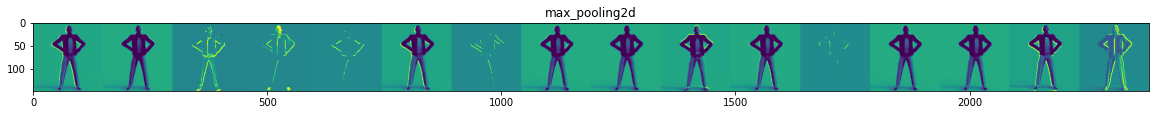

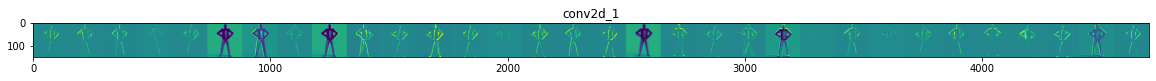

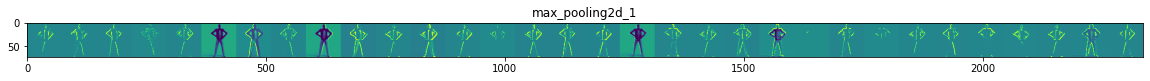

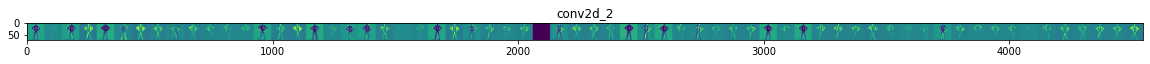

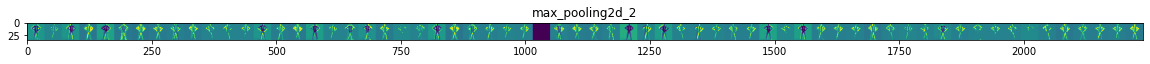

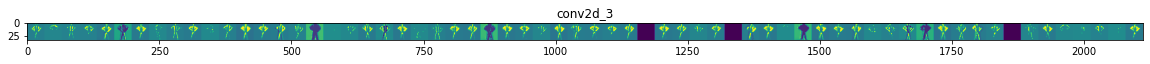

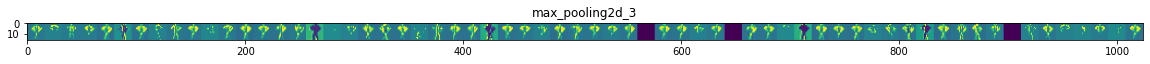

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')